# Extension example 2: Autoencoder

An auto-encoder has an encoder and a decoder. We allow the encoder to be an MLP or a KAN, and allow the decoder to be an MLP or a KAN. (When both encoder and decoder are KANs, it is actually uncessary to separate them: you can combine them into a larger KAN.)

In [1]:
from kan import *
from kan.MLP import MLP

# define the AutoEncoder class

class AutoEncoder(KAN):
    
    def __init__(self, width_enc=None, width_dec=None, grid=3, k=3, seed=1, enc_type='kan', dec_type='kan'):
        
        # this is a bit hacky. The class is inherited from the KAN class to make it easy to create the fit() method.
        super(AutoEncoder, self).__init__(width=[1,1])
        
        if enc_type == 'kan':
            self.encoder = KAN(width=width_enc, grid=grid, k=k, seed=seed, auto_save=False, base_fun='identity')
        elif enc_type == 'mlp':
            self.encoder = MLP(width=width_enc, seed=seed)
            
        if dec_type == 'kan':
            self.decoder = KAN(width=width_dec, grid=grid, k=k, seed=seed, auto_save=False, base_fun='identity')
        elif dec_type == 'mlp':
            self.decoder = MLP(width=width_dec, seed=seed)
        
        self.enc_type = enc_type
        self.dec_type = dec_type
        
    def forward(self, x, singularity_avoiding=False, y_th=1000.):
        hidden = self.encoder(x)
        y = self.decoder(hidden)
        return y
    
    def get_params(self):
        return list(self.encoder.parameters()) + list(self.decoder.parameters())
    
    def get_reg(self, reg_metric='fa', lamb_l1=1., lamb_entropy=2., lamb_coef=1., lamb_coefdiff=0.):
        
        if self.enc_type == 'kan':
            enc_reg = self.encoder.reg(reg_metric, lamb_l1, lamb_entropy, lamb_coef, lamb_coefdiff)
        else:
            enc_reg = self.encoder.reg(reg_metric='w', lamb_l1=lamb_l1, lamb_entropy=lamb_entropy)
        
        if self.dec_type == 'kan':
            dec_reg = self.decoder.reg(reg_metric, lamb_l1, lamb_entropy, lamb_coef, lamb_coefdiff)
        else:
            dec_reg = self.decoder.reg(reg_metric='w', lamb_l1=lamb_l1, lamb_entropy=lamb_entropy)
            
        return enc_reg + dec_reg
    
    def attribute(self):
        self.decoder.attribute()
        self.encoder.attribute(out_score=self.decoder.feature_score)
        
        
    def update_grid(self, x):
        
        if self.enc_type == 'kan':
            self.encoder.update_grid_from_samples(x)
            
        if self.dec_type == 'kan':
            self.decoder.update_grid_from_samples(hidden)
            
    def disable_symbolic_in_fit(self, lamb):
        if self.enc_type == 'kan':
            self.encoder.disable_symbolic_in_fit(lamb)
        if self.dec_type == 'kan':
            self.decoder.disable_symbolic_in_fit(lamb)
        return None, None
        
            
    def fit(self, dataset, reg_metric='act', steps=20, lamb=0., lamb_l1=1., lamb_entropy=2., lamb_coef=1., lamb_coefdiff=0.):
        super(AutoEncoder, self).fit(dataset, reg_metric=reg_metric, steps=steps, lamb=lamb, lamb_l1=lamb_l1, lamb_entropy=lamb_entropy, lamb_coef=lamb_coef, lamb_coefdiff=lamb_coefdiff)
        

In [2]:
x = torch.normal(0,1,size=(1000,4))
x[:,[2]] = x[:,[0]]
x[:,[3]] = x[:,[1]]

fraction = 0.8
num = x.shape[0]
train_num = int(num * fraction)
test_num = num - train_num
train_id = np.random.choice(num, train_num, replace=False)
test_id = list(set(range(num)) - set(train_id))
dataset = {}
dataset['train_input'] = dataset['train_label'] = x[train_id]
dataset['test_input'] = dataset['test_label'] = x[test_id]

Case 1: KAN encoder, KAN decoder

In [3]:
enc_type = 'kan' # 'kan' or 'mlp'
dec_type = 'kan' # 'kan' or 'mlp'

model = AutoEncoder(width_enc=[4,5,2], width_dec=[2,5,4], seed=0, enc_type=enc_type, dec_type=dec_type)
model.fit(dataset, lamb=1e-3, steps=100);

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.22e-02 | test_loss: 1.27e-02 | reg: 3.36e+01 | : 100%|█| 100/100 [01:02<00:00,  1.61

saving model version 0.1


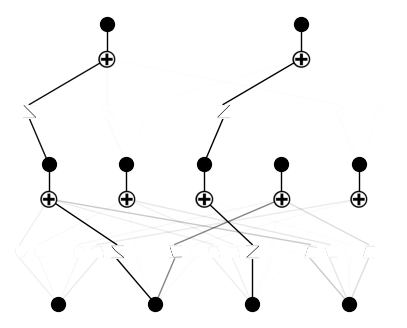

In [4]:
model.encoder.plot(metric='act')

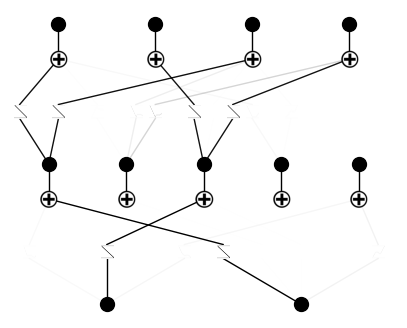

In [5]:
model.decoder.plot(metric='act')

Case 2: KAN encoder, MLP decoder

In [6]:
enc_type = 'kan' # 'kan' or 'mlp'
dec_type = 'mlp' # 'kan' or 'mlp'

model = AutoEncoder(width_enc=[4,5,2], width_dec=[2,5,4], seed=1, enc_type=enc_type, dec_type=dec_type)
model.fit(dataset, lamb=1e-3, steps=100);

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 1.16e-02 | test_loss: 2.59e-02 | reg: 3.83e+01 | : 100%|█| 100/100 [00:33<00:00,  2.96

saving model version 0.1


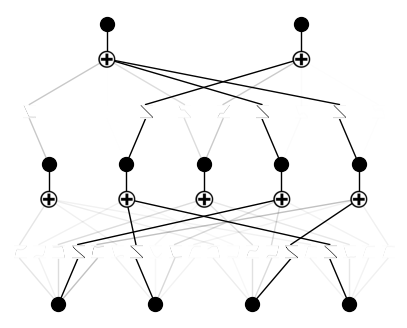

In [7]:
model.encoder.plot(metric='act')

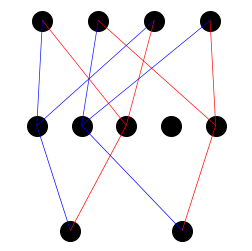

In [8]:
model.decoder.plot(metric='act')

Case 3: MLP encoder, KAN decoder

In [9]:
enc_type = 'mlp' # 'kan' or 'mlp'
dec_type = 'kan' # 'kan' or 'mlp'

model = AutoEncoder(width_enc=[4,5,2], width_dec=[2,5,4], seed=1, enc_type=enc_type, dec_type=dec_type)
model.fit(dataset, lamb=1e-3, steps=100);

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 3.29e-02 | test_loss: 7.09e-02 | reg: 4.95e+01 | : 100%|█| 100/100 [00:22<00:00,  4.43

saving model version 0.1


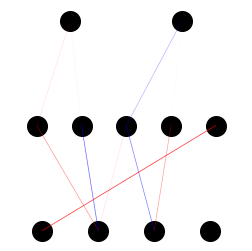

In [10]:
model.encoder.plot(metric='act')

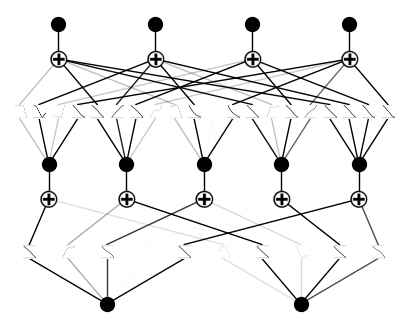

In [11]:
model.decoder.plot(metric='act')

Case 4: MLP encoder, MLP decoder

In [12]:
enc_type = 'mlp' # 'kan' or 'mlp'
dec_type = 'mlp' # 'kan' or 'mlp'

model = AutoEncoder(width_enc=[4,5,2], width_dec=[2,5,4], seed=1, enc_type=enc_type, dec_type=dec_type)
model.fit(dataset, lamb=1e-3, steps=100);

checkpoint directory created: ./model
saving model version 0.0


| train_loss: 2.62e-02 | test_loss: 3.64e-02 | reg: 3.19e+01 | : 100%|█| 100/100 [00:04<00:00, 21.95

saving model version 0.1


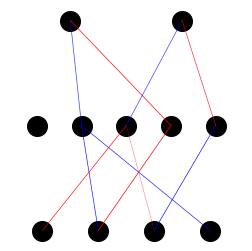

In [13]:
model.encoder.plot(metric='act')

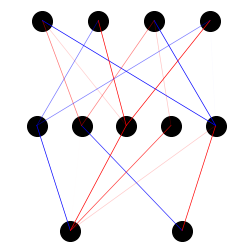

In [14]:
model.decoder.plot(metric='act')